In [0]:
!ls

my_model.h5  ratings.dat  sample_data  u1.test


In [0]:
import tensorflow as tf
graph = tf.get_default_graph()

In [0]:
filepath = 'ratings_data.txt'
# a = DataSet(filepath)

In [0]:
import numpy as np
import pandas as pd


In [0]:
# filename = './Data/ml-1m/u.data'
# name = ['user', 'item', 'ratings', 'time']
# df1 = pd.read_csv(filepath)
# df1 = df1.drop(columns=['time'])

In [0]:
trustfile = 'trusts.txt'
ratefile = 'movie-ratings.txt'

In [0]:
name = ['userID', 'movieID', 'genreID', 'reviewID', 'movieRating', 'date']
df = pd.read_csv(ratefile, sep=',',names=name)
df = df.drop(columns=['genreID','reviewID','date'])


In [0]:
lenu, leni = len(df.userID.unique()), len(df.movieID.unique())

In [0]:
trustname = ['trustorID', 'trusteeID', 'trustValue']
dft = pd.read_csv(trustfile, sep = ',', names = trustname)

In [0]:
df.movieID.max()

16121

In [0]:
dft.head()

,trustorID,trusteeID,trustValue
0,8874,14430,1
1,6417,17660,1
2,4218,953,1
3,4218,3304,1
4,4218,3977,1


In [0]:
from collections import defaultdict

In [0]:
trustmatrix = np.array(dft)

In [0]:
trustmatrix.shape

(40133, 3)

In [0]:
trustmatrix[1][0]

6417

In [0]:
len(dft.trusteeID.unique())

4299

In [0]:
trustor = defaultdict(dict)

In [0]:

for i in range(len(trustmatrix)):
  if trustmatrix[i][0] not in trustor:
    trustor[trustmatrix[i][0]] = {}
  trustor[trustmatrix[i][0]].append(trustmatrix[i][1])
  

AttributeError: ignored

In [0]:
trustor[1132]

{3825: 1, 13287: 1, 14923: 1, 18256: 1}

{3825: 1, 13287: 1, 14923: 1, 18256: 1}

In [0]:

# frame = pd.read_csv(filepath,sep=' ', names=['user', 'item', 'rating'])


In [0]:
data_dim = len(frame.user.unique()), len(frame.item.unique())
data = np.array(frame)
train, test = train_test_split(data, test_size=0.2)

In [0]:
df.head()

,user,item,ratings
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [0]:
data_dim = len(df.userID.unique()), len(df.movieID.unique())

In [0]:
data_dim[0]

17615

# **Deep Recommend**

In [0]:
ff = 'ratings.dat'

In [0]:
name = ['user', 'item', 'rating', 'time']
dff = pd.read_csv(ff, sep='::', names = name)
dff = dff.drop(columns = ['time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
dff.head()

,user,item,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [0]:
data_dim = len(dff.user.unique()), len(dff.item.unique())

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data = np.array(dff)
train, test = train_test_split(data, test_size=0.2)

In [0]:
u_train = train[:,0]
i_train = train[:,1]
r_train = train[:,2]
u_test = test[:,0]
i_test = test[:,1]
r_test = test[:,2]

In [0]:
# r_train = r_train/5
# r_test = r_test/5

In [0]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import dot, concatenate, Embedding, Input, Flatten, Dropout, Dense
from keras.models import Sequential
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras import backend as K

Using TensorFlow backend.


In [0]:
len_dim_i = [100,200,300]
len_dim_u = [100,200,300]
len_dim_r = [300,200,100]

In [0]:
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [0]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')

user_embedding = Embedding(output_dim=10, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=10, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

# reshape from shape: (batch_size, input_length, embedding_size)
# to shape: (batch_size, input_length * embedding_size) which is
# equal to shape: (batch_size, embedding_size)

# user_embedding = (Dense(300))(user_embedding)
# item_embedding = (Dense(300))(item_embedding)
# user_embedding = (Dense(600))(user_embedding)
# item_embedding = (Dense(600))(item_embedding)
# user_embedding = (Dense(1200))(user_embedding)
# item_embedding = (Dense(1200))(item_embedding)
for i in range(len(len_dim_u)):
    user_embedding = (Dense(len_dim_u[i], activation="relu"))(user_embedding)
    user_embedding = (Dropout(0.1))(user_embedding)
for i in range(len(len_dim_i)):
    item_embedding = (Dense(len_dim_i[i], activation="relu"))(item_embedding)
    item_embedding = (Dropout(0.1))(item_embedding)
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

    
# y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
y = concatenate([user_vecs, item_vecs])
# y = (Dense(1, activation="relu"))(y)
for i in range(len(len_dim_r)):
    y = (Dense(len_dim_r[i], activation="relu"))(y)
    y = (BatchNormalization())(y)
    y = (Dropout(0.2))(y)
# y = Dense(1, activation="relu")(y)
# M = Sequential()
# M.add(y)
# y = (Dropout(0.25))(y)
# y = (Dense(64))(y)
# y = (Dropout(0.2))(y)
# y = (Dense(32))(y)
# y = (Dropout(0.25))(y)
# y = (Dense(16))(y)
# y = (Dropout(0.1))(y)
# y = (Dense(4))(y)
# y = (Dropout(0.2))(y)
y = (Dense(1, activation='relu'))(y)

model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mae')

In [28]:
history = model.fit([u_train,i_train], r_train,validation_data=([u_test,i_test], r_test), batch_size=32, epochs = 15, verbose=1, shuffle=True)

Train on 800167 samples, validate on 200042 samples
Epoch 1/15
800167/800167 [==============================] - 502s 627us/step - loss: 1.0374 - val_loss: 0.7622
Epoch 2/15
800167/800167 [==============================] - 506s 632us/step - loss: 0.7971 - val_loss: 0.7201
Epoch 3/15
800167/800167 [==============================] - 501s 627us/step - loss: 0.7642 - val_loss: 0.7173
Epoch 4/15
800167/800167 [==============================] - 519s 649us/step - loss: 0.7483 - val_loss: 0.7085
Epoch 5/15
800167/800167 [==============================] - 492s 614us/step - loss: 0.7354 - val_loss: 0.7015
Epoch 6/15
800167/800167 [==============================] - 521s 652us/step - loss: 0.7264 - val_loss: 0.6956
Epoch 7/15
800167/800167 [==============================] - 502s 627us/step - loss: 0.7201 - val_loss: 0.7015
Epoch 8/15
800167/800167 [==============================] - 509s 636us/step - loss: 0.7162 - val_loss: 0.6968
Epoch 9/15
800167/800167 [==============================] - 467s 584

In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 10)        60410       user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 10)        37070       item[0][0]                       
__________________________________________________________________________________________________
dense_21 (

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

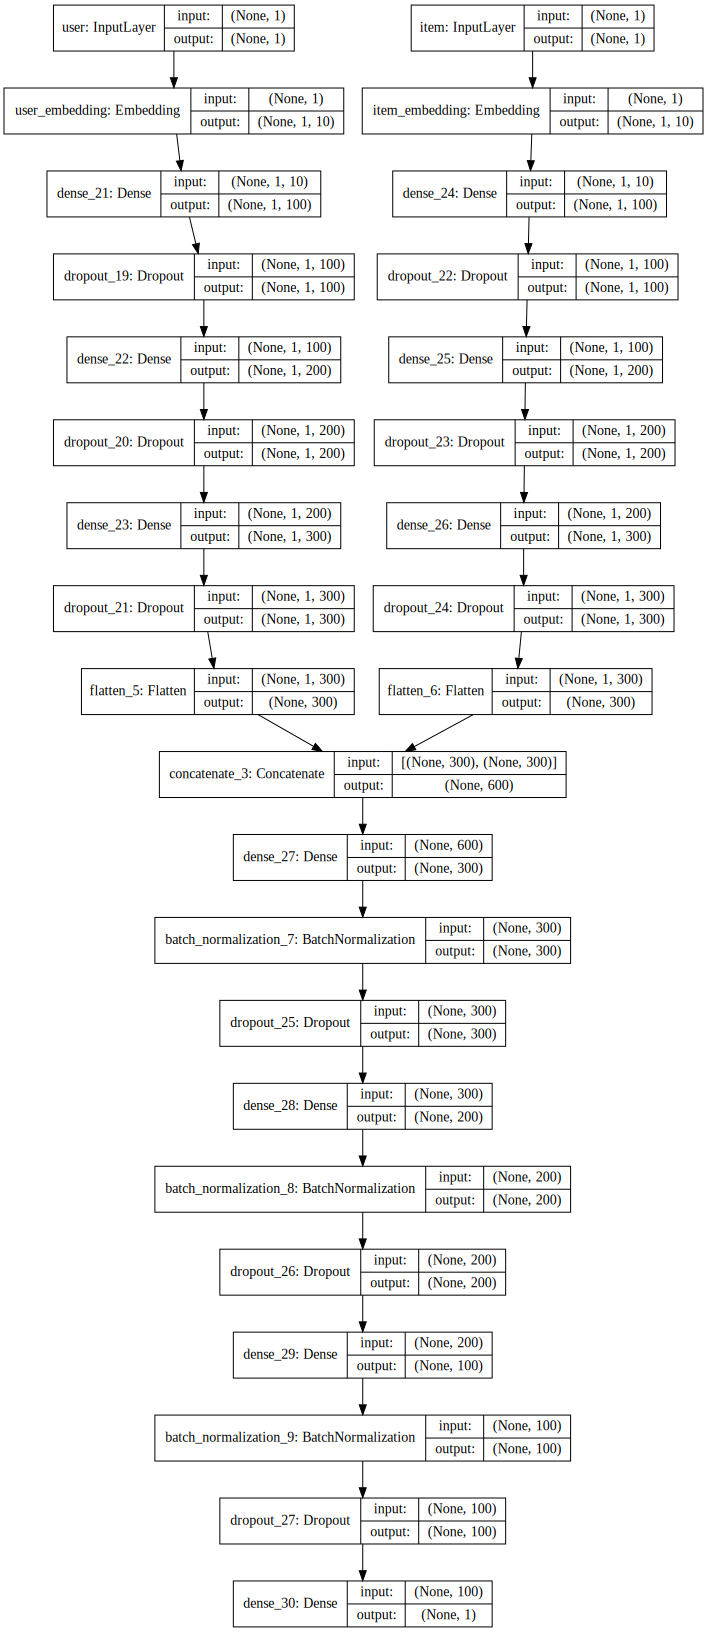

In [31]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [0]:
# print(history)

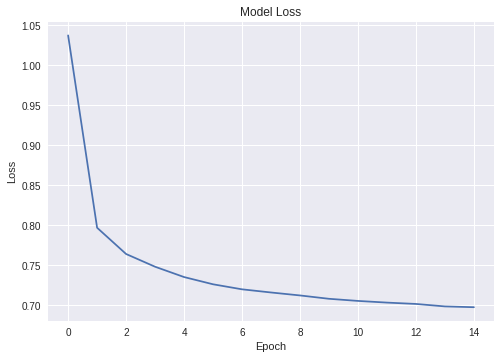

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

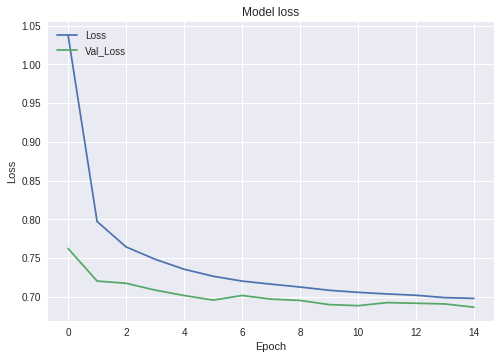

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [34]:
# Plot training & validation loss values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accury')
plt.ylabel('accury')
plt.xlabel('Epoch')
plt.legend(['Acc', 'Val_acc'], loc='upper left')
plt.show()

KeyError: ignored

In [0]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
model1 = load_model('my_model.h5')

In [0]:
dtest = pd.read_csv('u1.test', sep = '\t', names = ['user', 'item', 'rating', 'time'])
dtest = dtest.drop(columns=['time'])

In [0]:
dtest.head()

,user,item,rating
0,1,6,5
1,1,10,3
2,1,12,5
3,1,14,5
4,1,17,3


In [0]:
pre = np.array(dtest)

In [0]:
utest = pre[:,0]
itest = pre[:,1]
rtest = pre[:,2]

In [0]:
a = np.ones((1410,))

In [0]:
utest.shape

(20000,)

In [0]:
useru = dtest.user.unique()
itemu = dtest.item.unique()

In [0]:
itemtest = dtest[dtest['user'] != 1].item.unique()

In [0]:
itemtest.shape

(1410,)

In [0]:
aaa = np.empty((5,)); aaa.fill(3)

In [0]:
aaa.shape

(5,)

In [0]:
for i in range(len(pre)):
  if pre[i][0] == 1:
    print()

In [0]:
list_result = model.predict([pre[:,0],pre[:,1]])

In [0]:
kq = np.concatenate((pre,list_result), axis=1)

In [0]:
kq[20:40]

array([[ 1.        , 60.        ,  5.        ,  4.95898485],
       [ 1.        , 61.        ,  4.        ,  4.69534159],
       [ 1.        , 62.        ,  3.        ,  4.17554617],
       [ 1.        , 64.        ,  5.        ,  3.76302147],
       [ 1.        , 65.        ,  4.        ,  1.88723934],
       [ 1.        , 67.        ,  3.        ,  4.61987114],
       [ 1.        , 69.        ,  3.        ,  4.26258707],
       [ 1.        , 70.        ,  3.        ,  4.98160601],
       [ 1.        , 72.        ,  4.        ,  4.97385073],
       [ 1.        , 73.        ,  3.        ,  3.58459067],
       [ 1.        , 74.        ,  1.        ,  3.34413075],
       [ 1.        , 76.        ,  4.        ,  3.15184093],
       [ 1.        , 78.        ,  1.        ,  2.74834776],
       [ 1.        , 80.        ,  4.        ,  4.85453558],
       [ 1.        , 81.        ,  5.        ,  3.76723695],
       [ 1.        , 82.        ,  5.        ,  4.14285135],
       [ 1.        , 84.

In [0]:
sort_list = list_result[list_result[:,0].argsort()[::-1]]

In [0]:
print(sort_list[:10])

[[5.0807433]
 [5.0270395]
 [5.0107017]
 [4.993686 ]
 [4.969646 ]
 [4.841012 ]
 [4.8196573]
 [4.7776213]
 [4.7532244]
 [4.739296 ]]


In [0]:
list_result[list_result[:,0].argsort()[::-1]]

array([[5.0807433 ],
       [5.0270395 ],
       [5.0107017 ],
       ...,
       [0.9137943 ],
       [0.90736496],
       [0.0081968 ]], dtype=float32)

## **Social**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
file = 'trust_data.csv'


In [0]:

df1 = pd.read_csv(file, sep = ' ', names = ['user1', 'user2', 'trust'])

In [0]:
df1.head()

,user1,user2,trust
NaN,22605,42915,1
NaN,22605,5052,1
NaN,22605,42913,1
NaN,22605,18420,1
NaN,22605,42914,1


In [0]:
trustdata = np.array(df1)

In [0]:
trustdata.shape

(487183, 3)

In [0]:
len(df1.user2.unique())*len(df1.user1.unique())

1673820480

In [0]:
matrix = np.zeros([len(df1.user1.unique())+1, len(df1.user2.unique())+1], dtype=np.float32)
for i in range(1,len(df1.user2.unique())+1):
  u = trustdata[i][0]
  uu = trustdata[i][1]
  t = trustdata[i][2]
  matrix[u][uu] = t
  
matrix

In [0]:
print(var)

In [0]:
df.head()

In [0]:
uid1 = trustdata[:,0]
uid2 = trustdata[:,1]
tr = trustdata[:,2]

In [0]:
uid1.shape

(487183,)

In [0]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')
uid_input = Input(shape=[1], name = 'uid1')
uid_input_2 = Input(shape=[1], name = 'uid2')
trust_input = Input(shape=[1], name = 'trust')

user_embedding = Embedding(output_dim=10, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=10, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

# reshape from shape: (batch_size, input_length, embedding_size)
# to shape: (batch_size, input_length * embedding_size) which is
# equal to shape: (batch_size, embedding_size)
# for i in range(len(len_dim_u)):
#     user_embedding = (Dense(len_dim_u[i], activation="relu"))(user_embedding)
#     user_vecs = (Dropout(0.1))(user_vecs)
# for i in range(len(len_dim_i)):
#     item_embedding = (Dense(len_dim_i[i], activation="relu"))(item_embedding)
#     item_vecs = (Dropout(0.1))(item_vecs)
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

# uid_input = Flatten()(uid_input)
# uid_input_2 = Flatten()(uid_input_2)
# trust_input = Flatten()(trust_input)

    
# y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
y = concatenate([user_vecs, item_vecs,uid_input, uid_input_2,trust_input])
# y = concatenate([uid_input, uid_input_2,trust_input])(y)
# y = (Dense(1, activation="relu"))(y)
for i in range(len(len_dim_r)):
    y = (Dense(len_dim_r[i], activation="relu"))(y)
    y = (BatchNormalization())(y)
#     y = (Dropout(0.2))(y)
y = (Dense(1, activation='relu'))(y)

model = Model(inputs=[user_id_input, item_id_input,uid_input, uid_input_2,trust_input], outputs=[y])
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss=rmse,metrics=['accuracy'])

In [0]:
history = model.fit([u_train,i_train,uid1,uid2,tr], r_train, batch_size=32, epochs = 15, verbose=1)

ValueError: ignored

In [0]:
a = np.zeros((lenu, leni))

In [0]:
b = np.array(df)

In [0]:
for i in b:
  u = i[0]
  m = i[1]
  r = i[2]
  a[u-1][m-1] = r

In [0]:
a

array([[5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
df.loc[df['userID'].idxmax()]

userID         17615
movieID        16108
movieRating        5
Name: 72646, dtype: int64

In [0]:
c = np.array(dft)

In [0]:
for i in c:
  if i[0] == 17615 or i[1] == 17615:
    print(i)

[ 3792 17615     1]
